In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[8,8,1] , [7,9,1] , [6,7,0] , [5,6,0]] , columns =['cgpa' , 'profile_score' , 'placed'])

In [ ]:
df

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,7,0
3,5,6,0


In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(2,activation = 'sigmoid' , input_dim = 2))
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.get_weights()

[array([[-0.04859734,  1.1692721 ],
        [-1.0534078 , -1.0515434 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.22803068],
        [-1.0861748 ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
new_weights = [np.array([[0.1 , 0.1] , [0.1 , 0.1]] , dtype = np.float32) , np.array([0.,0.] , dtype = np.float32) , np.array([[0.1] , [0.1]] , dtype = np.float32) , np.array([0.] , dtype = np.float32)]

In [ ]:
model.set_weights(new_weights)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss ='binary_crossentropy' , optimizer = optimizer)

In [ ]:
history = model.fit(df.iloc[:,0:-1].values , df['placed'].values , epochs = 75 , verbose = 1 , batch_size = 1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6829  
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6828  
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6824 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7139 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7148 
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6566 
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7030 
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6828 
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6719 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6828 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7289 
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7039 
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7291 
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7024 
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6724 
Epoch 16/75
4/4 ━━━━━━━━━━━━━━━━

In [ ]:
model.get_weights()

[array([[0.09376476, 0.09376476],
        [0.08734677, 0.08734677]], dtype=float32),
 array([-0.05180209, -0.05180209], dtype=float32),
 array([[0.09146044],
        [0.09146044]], dtype=float32),
 array([-0.0206652], dtype=float32)]

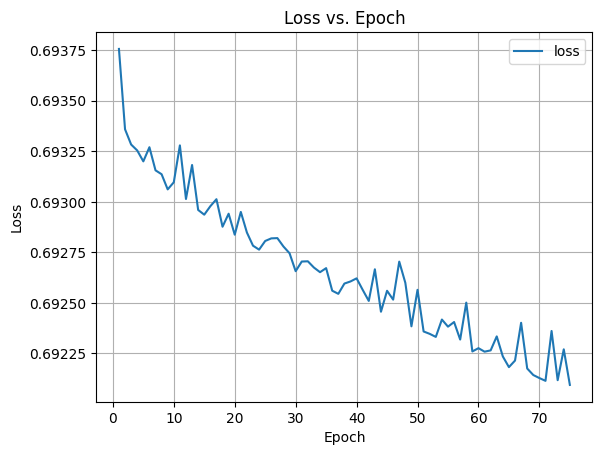

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 76) , history.history['loss'] , label = 'loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.grid(True)
plt.legend()
plt.show()